In [1]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,Activation,MaxPooling2D
#from keras.utils import normalize
from keras.layers import Concatenate
from keras import Input
from keras.callbacks import ModelCheckpoint
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, Reshape, GaussianNoise
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.base import TransformerMixin, BaseEstimator
import pandas as pd
from itertools import product
import tensorflow as tf
from tensorflow.keras.layers import Reshape
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GaussianNoise, Conv1D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
trigly = pd.read_csv("y_aug_trigly.csv").set_index("Unnamed: 0")
X_data = pd.read_csv("X_aug.csv").set_index("Unnamed: 0")
result_df = pd.concat([X_data, trigly], axis=1)
last_column = result_df.columns[-1]
result_df = result_df.rename(columns={last_column: 'target'})
result_df = result_df.iloc[:, 1:]
result_df

,1,2,3,4,5,6,7,8,9,10,...,732,733,734,735,736,737,738,739,740,target
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,-1.833450,-1.546857,-1.432146,-1.721387,-2.109355,-2.246623,-2.240362,-2.298069,-2.294333,-2.170838,...,1.203929,1.250566,1.217925,1.265712,1.435539,1.696967,2.104030,2.698010,3.394823,1.20
1,-1.977520,-1.694743,-1.581531,-1.866827,-2.249520,-2.384891,-2.378667,-2.435550,-2.431817,-2.309939,...,1.053225,1.099280,1.067126,1.114316,1.281901,1.539853,1.941477,2.527499,3.214968,1.20
2,-1.845012,-1.569735,-1.459570,-1.737446,-2.110161,-2.242050,-2.236062,-2.291525,-2.287963,-2.169360,...,1.052587,1.097359,1.065977,1.111854,1.274964,1.526068,1.917070,2.487628,3.156967,1.20
3,-1.901622,-1.617518,-1.503843,-1.790705,-2.175461,-2.311635,-2.305492,-2.362778,-2.359140,-2.236755,...,1.061660,1.107836,1.075405,1.122721,1.291047,1.550199,1.953756,2.542649,3.233506,1.20
4,-1.923926,-1.648852,-1.538715,-1.816207,-2.188438,-2.320098,-2.314028,-2.369343,-2.365696,-2.247129,...,1.035541,1.080354,1.049093,1.095010,1.258037,1.508963,1.899639,2.469680,3.138398,1.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,-3.407716,-3.021195,-2.554237,-2.317790,-2.241815,-2.122757,-1.997299,-2.017568,-2.196671,-2.462472,...,1.313936,1.428233,1.554626,1.675216,1.883641,2.285395,2.868954,3.552106,4.282689,0.66
9696,-3.141295,-2.770776,-2.323132,-2.096505,-2.023738,-1.909662,-1.789450,-1.808962,-1.980765,-2.235694,...,1.328822,1.438332,1.559440,1.674984,1.874745,2.259870,2.819311,3.474241,4.174649,0.66
9697,-3.376081,-2.993580,-2.531457,-2.297510,-2.222408,-2.104659,-1.980575,-2.000742,-2.178133,-2.441343,...,1.222484,1.335519,1.460528,1.579793,1.786003,2.183582,2.761124,3.437250,4.160326,0.66


In [4]:
u = pd.read_csv("final.csv")
u

,Unnamed: 0,АЛТ_COBAS,АМИЛАЗА_ПАНКРЕАТИЧЕСКАЯ_COBAS,АСТ_COBAS,БЕЛОК_ОБЩИЙ_СЫВ_COBAS,БИЛИРУБИН_НЕПРЯМОЙ_COBAS,БИЛИРУБИН_ОБЩИЙ_2_COBAS,БИЛИРУБИН_ПРЯМОЙ_COBAS,ГАММА-ГТ_COBAS,ЖЕЛЕЗО_СЫВ_COBAS,...,1353.7843,1354.74853,1355.7127699999999,1356.6770000000001,1357.6412300000002,1358.60547,1359.5697,1360.53394,1361.4981699999998,1362.4624
0,1897,20.000000,17.0,21.400000,68.4,2.87,5.26,2.39,33.0,21.75,...,0.97444,1.17197,1.21980,1.18632,1.23533,1.40951,1.67764,2.09514,2.70435,3.41903
1,3786,18.100000,40.0,15.300000,70.8,4.23,6.79,2.56,19.0,14.06,...,0.98935,1.24597,1.61786,2.00000,2.30478,2.65579,3.19385,3.88026,4.61330,5.31514
2,3824,23.300000,31.0,19.800000,73.1,9.76,13.85,4.09,19.0,15.80,...,1.14454,1.27393,1.44144,1.58303,1.69189,1.79584,2.06795,2.75119,3.76612,4.74865
3,3831,15.100000,19.0,15.300000,74.0,3.37,5.68,2.31,30.0,10.88,...,1.05844,1.00934,1.13272,1.44539,1.84100,2.30015,2.88211,3.59298,4.39260,5.18190
4,4952,10.500000,53.0,19.700000,73.0,7.34,11.86,4.52,18.0,8.27,...,1.09299,1.22220,1.38399,1.43882,1.41184,1.50842,1.84966,2.40267,3.10426,3.87681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,96717,18.500000,21.0,18.800000,72.7,6.54,9.52,2.98,18.0,15.96,...,1.13963,1.34511,1.60684,1.88209,2.00320,1.93835,1.98480,2.45391,3.30606,4.26119
93,96721,11.100000,18.0,13.400000,72.8,6.30,9.70,3.40,16.0,14.29,...,1.18643,1.28860,1.37564,1.45492,1.47158,1.50406,1.80898,2.51398,3.42923,4.27672
94,98518,18.755435,21.0,20.703191,72.8,5.78,9.15,3.37,82.0,25.73,...,0.84795,0.98657,1.17055,1.36923,1.50902,1.59533,1.84525,2.43253,3.26030,4.12724
95,98532,27.100000,30.0,20.300000,73.4,5.10,7.90,2.80,40.0,22.02,...,1.15899,1.15537,1.03847,0.88431,0.86267,1.09400,1.53268,2.10503,2.79178,3.50557


In [5]:
final = pd.read_csv("final.csv").set_index("Unnamed: 0")
final

,АЛТ_COBAS,АМИЛАЗА_ПАНКРЕАТИЧЕСКАЯ_COBAS,АСТ_COBAS,БЕЛОК_ОБЩИЙ_СЫВ_COBAS,БИЛИРУБИН_НЕПРЯМОЙ_COBAS,БИЛИРУБИН_ОБЩИЙ_2_COBAS,БИЛИРУБИН_ПРЯМОЙ_COBAS,ГАММА-ГТ_COBAS,ЖЕЛЕЗО_СЫВ_COBAS,КАЛЬЦИЙ_СЫВ_COBAS,...,1353.7843,1354.74853,1355.7127699999999,1356.6770000000001,1357.6412300000002,1358.60547,1359.5697,1360.53394,1361.4981699999998,1362.4624
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1897,20.000000,17.0,21.400000,68.4,2.87,5.26,2.39,33.0,21.75,2.36,...,0.97444,1.17197,1.21980,1.18632,1.23533,1.40951,1.67764,2.09514,2.70435,3.41903
3786,18.100000,40.0,15.300000,70.8,4.23,6.79,2.56,19.0,14.06,2.30,...,0.98935,1.24597,1.61786,2.00000,2.30478,2.65579,3.19385,3.88026,4.61330,5.31514
3824,23.300000,31.0,19.800000,73.1,9.76,13.85,4.09,19.0,15.80,2.48,...,1.14454,1.27393,1.44144,1.58303,1.69189,1.79584,2.06795,2.75119,3.76612,4.74865
3831,15.100000,19.0,15.300000,74.0,3.37,5.68,2.31,30.0,10.88,2.41,...,1.05844,1.00934,1.13272,1.44539,1.84100,2.30015,2.88211,3.59298,4.39260,5.18190
4952,10.500000,53.0,19.700000,73.0,7.34,11.86,4.52,18.0,8.27,2.32,...,1.09299,1.22220,1.38399,1.43882,1.41184,1.50842,1.84966,2.40267,3.10426,3.87681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96717,18.500000,21.0,18.800000,72.7,6.54,9.52,2.98,18.0,15.96,2.43,...,1.13963,1.34511,1.60684,1.88209,2.00320,1.93835,1.98480,2.45391,3.30606,4.26119
96721,11.100000,18.0,13.400000,72.8,6.30,9.70,3.40,16.0,14.29,2.33,...,1.18643,1.28860,1.37564,1.45492,1.47158,1.50406,1.80898,2.51398,3.42923,4.27672
98518,18.755435,21.0,20.703191,72.8,5.78,9.15,3.37,82.0,25.73,2.46,...,0.84795,0.98657,1.17055,1.36923,1.50902,1.59533,1.84525,2.43253,3.26030,4.12724


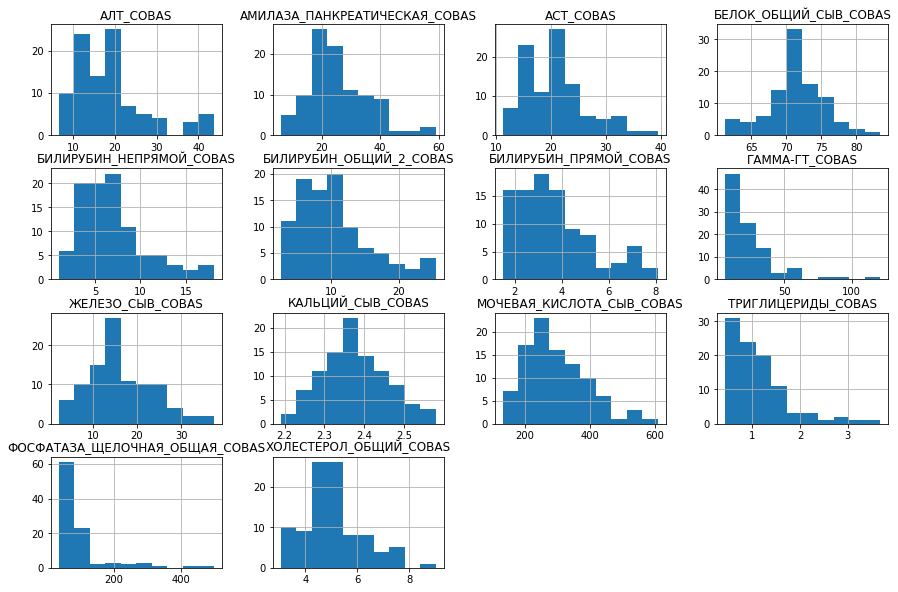

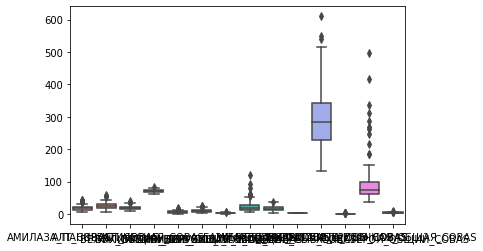

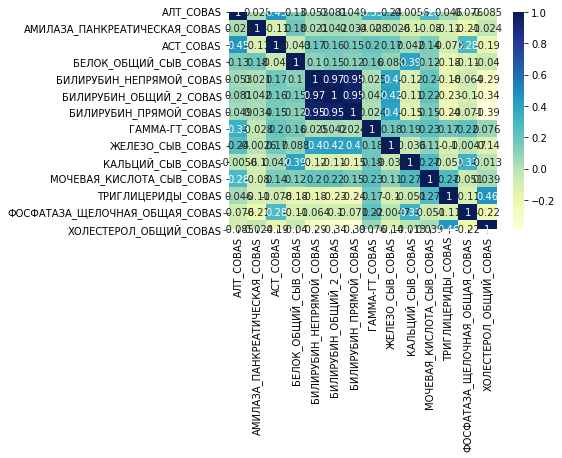

In [9]:
# Visualize the data distribution
final.iloc[:,0:14].hist(bins=10, figsize=(15,10))
plt.show()

# Check for outliers
sns.boxplot(data=final.iloc[:,0:14])
plt.show()

# Check for correlations
corr = final.iloc[:,0:14].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

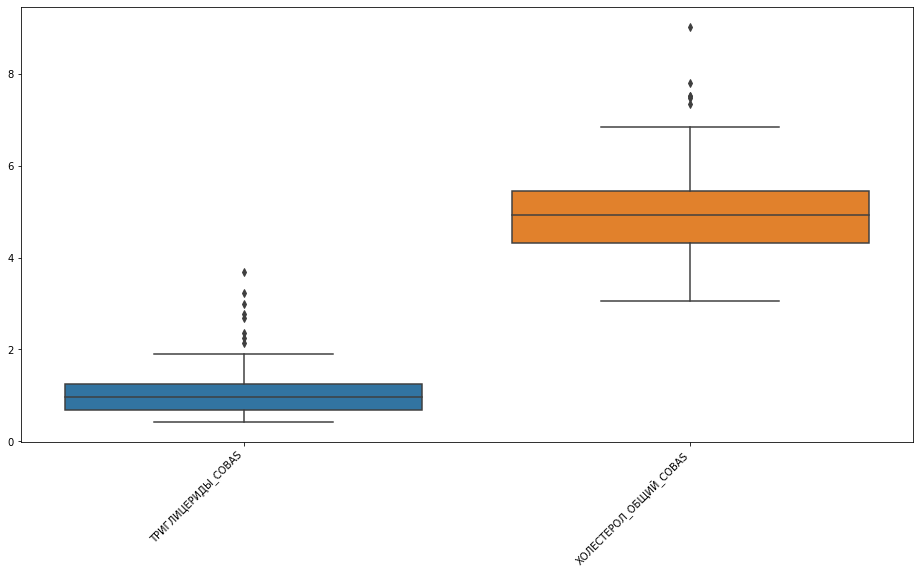

In [22]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=final.loc[:,["ТРИГЛИЦЕРИДЫ_COBAS", "ХОЛЕСТЕРОЛ_ОБЩИЙ_COBAS"]])
plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
final.iloc[:,:14]

,АЛТ_COBAS,АМИЛАЗА_ПАНКРЕАТИЧЕСКАЯ_COBAS,АСТ_COBAS,БЕЛОК_ОБЩИЙ_СЫВ_COBAS,БИЛИРУБИН_НЕПРЯМОЙ_COBAS,БИЛИРУБИН_ОБЩИЙ_2_COBAS,БИЛИРУБИН_ПРЯМОЙ_COBAS,ГАММА-ГТ_COBAS,ЖЕЛЕЗО_СЫВ_COBAS,КАЛЬЦИЙ_СЫВ_COBAS,МОЧЕВАЯ_КИСЛОТА_СЫВ_COBAS,ТРИГЛИЦЕРИДЫ_COBAS,ФОСФАТАЗА_ЩЕЛОЧНАЯ_ОБЩАЯ_COBAS,ХОЛЕСТЕРОЛ_ОБЩИЙ_COBAS
Unnamed: 0,,,,,,,,,,,,,,
1897,20.000000,17.0,21.400000,68.4,2.87,5.26,2.39,33.0,21.75,2.36,212.83,1.200000,54.0,4.14
3786,18.100000,40.0,15.300000,70.8,4.23,6.79,2.56,19.0,14.06,2.30,333.99,0.940000,99.0,4.94
3824,23.300000,31.0,19.800000,73.1,9.76,13.85,4.09,19.0,15.80,2.48,367.07,1.180000,57.0,5.18
3831,15.100000,19.0,15.300000,74.0,3.37,5.68,2.31,30.0,10.88,2.41,344.23,0.720000,98.0,4.58
4952,10.500000,53.0,19.700000,73.0,7.34,11.86,4.52,18.0,8.27,2.32,218.39,1.420000,70.0,5.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96717,18.500000,21.0,18.800000,72.7,6.54,9.52,2.98,18.0,15.96,2.43,373.65,2.150000,54.0,6.84
96721,11.100000,18.0,13.400000,72.8,6.30,9.70,3.40,16.0,14.29,2.33,377.00,1.190000,60.0,5.14
98518,18.755435,21.0,20.703191,72.8,5.78,9.15,3.37,82.0,25.73,2.46,413.10,1.111875,86.0,7.51


In [10]:
de = final.iloc[:, 0:14].copy()
columns_to_drop = ['БИЛИРУБИН_НЕПРЯМОЙ_COBAS',  'БИЛИРУБИН_ПРЯМОЙ_COBAS']
de = de.drop(columns=columns_to_drop)
de

,АЛТ_COBAS,АМИЛАЗА_ПАНКРЕАТИЧЕСКАЯ_COBAS,АСТ_COBAS,БЕЛОК_ОБЩИЙ_СЫВ_COBAS,БИЛИРУБИН_ОБЩИЙ_2_COBAS,ГАММА-ГТ_COBAS,ЖЕЛЕЗО_СЫВ_COBAS,КАЛЬЦИЙ_СЫВ_COBAS,МОЧЕВАЯ_КИСЛОТА_СЫВ_COBAS,ТРИГЛИЦЕРИДЫ_COBAS,ФОСФАТАЗА_ЩЕЛОЧНАЯ_ОБЩАЯ_COBAS,ХОЛЕСТЕРОЛ_ОБЩИЙ_COBAS
Unnamed: 0,,,,,,,,,,,,
1897,20.000000,17.0,21.400000,68.4,5.26,33.0,21.75,2.36,212.83,1.200000,54.0,4.14
3786,18.100000,40.0,15.300000,70.8,6.79,19.0,14.06,2.30,333.99,0.940000,99.0,4.94
3824,23.300000,31.0,19.800000,73.1,13.85,19.0,15.80,2.48,367.07,1.180000,57.0,5.18
3831,15.100000,19.0,15.300000,74.0,5.68,30.0,10.88,2.41,344.23,0.720000,98.0,4.58
4952,10.500000,53.0,19.700000,73.0,11.86,18.0,8.27,2.32,218.39,1.420000,70.0,5.69
...,...,...,...,...,...,...,...,...,...,...,...,...
96717,18.500000,21.0,18.800000,72.7,9.52,18.0,15.96,2.43,373.65,2.150000,54.0,6.84
96721,11.100000,18.0,13.400000,72.8,9.70,16.0,14.29,2.33,377.00,1.190000,60.0,5.14
98518,18.755435,21.0,20.703191,72.8,9.15,82.0,25.73,2.46,413.10,1.111875,86.0,7.51


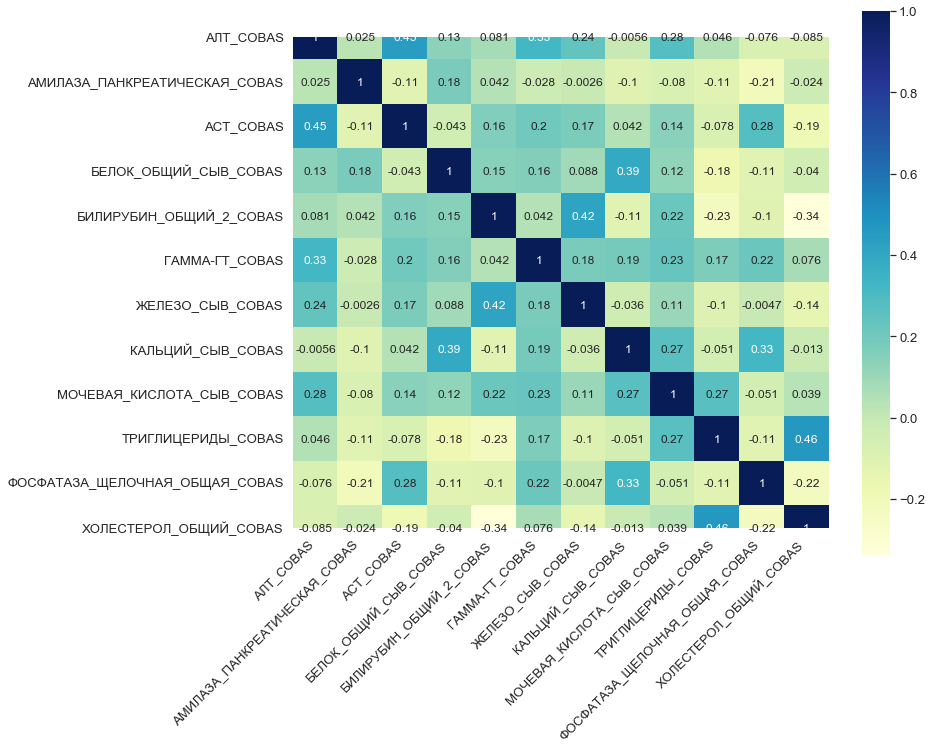

In [12]:
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)
sns.heatmap(corr, cmap="YlGnBu", annot=True, square=True, 
            xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            annot_kws={"fontsize":12})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()